# Finding the Best Place for a Coffee House in Vienna, Austria

## IBM Data Science Capstone Project via Coursera by John Oxales

### 1. Introduction
#### 1.1 Background
Vienna’s very first coffee house opened in 1683. Even if Vienna was not the pioneer in coffee house culture, it has - over the centuries - established a coffee house tradition like no other city in the world. Coffee and coffee houses are at their best in Vienna!<br>
#### 1.2 Problem
Since so many coffee houses can be already found in any district in Vienna it would be good to know if there is a strong correlation between the presence of coffee houses in the vicinity of sightseeing places or any other venues like offices or shopping malls. It can be assumed that those places are highly frequented. This is a relevant key-indicator to be considered in order to have a profitable business. Furthermore the question for a reasonable rent comes up in order to find the ideal spot for the coffee house. So two main criterias need to be met: 
area of interest (representing high frequency of passers-by) 
low rental fee <br> 
#### 1.3 Interest
These questions could be of high interest for any new investor or entrepreneur who wants to open one or maybe even more coffee houses in Austria’s capital. This project can also be part of business analytics for larger companies who consider expanding their business. <br>
### 2. Data acquisition and cleaning
#### 2.1 Data sources
For this project the following data is going to be used to gain insight and answer the questions:
<br>
##### Datasource:
Foursquare API: "https://developer.foursquare.com/"
##### Purpose: 
Get Top 10 common venues in each neighborhood (coffee houses, sightseeing spots, malls etc.)
##### Datasource: 
Vienna rent statistics: “https://www.immopreise.at/Wien/Wohnung/Miete”
##### Purpose: 
For practice purposes this data is only going to represent a rough overview of mean rent in each district from this year. This should be sufficient in the beginning. 
Since a proper dataset for the rent prices doesn't exist, it must be scraped from 'Immopreise'.


#### 2.2 Webscraping Immopreise

##### Importing libraries

In [2]:
!pip install selenium

In [3]:
import pandas as pd
from selenium import webdriver

In [5]:
# scraping Immopreise
'''since the table is dynamically generated on this site, a workaround with selenium is necessary'''

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

site = 'https://www.immopreise.at/wien/wohnung/miete' # website has to be open in chrome browser otherwise an error arises

'''IMPORTANT NOTE: In order to run this code chromedriver.exe needs to be downloaded from here:
https://sites.google.com/chromium.org/driver/capabilities --> follow instructions from documentation!!!'''

wd = webdriver.Chrome(executable_path="C:\\Program Files (x86)\\Google\\Chrome\\Application\\chromedriver.exe", options=options)
wd.get(site)

html = wd.page_source

df = pd.read_html(html)
immo = df[0]
print(immo)

                        Bezirk    ≤50m²  51-80m² 81-129m²   >130m²     Ø/m²  \
0            1., Innere Stadtc  € 22,97  € 20,32  € 18,84  € 19,68  € 20,00   
1            2., Leopoldstadtc  € 17,55  € 15,01  € 14,77  € 13,36  € 15,35   
2              3., Landstraßec  € 18,94  € 16,65  € 15,44  € 17,70  € 17,71   
3                  4., Wiedenc  € 18,37  € 15,11  € 16,70  € 16,41  € 16,22   
4              5., Margaretenc  € 17,07  € 14,15  € 13,52  € 16,60  € 15,40   
5               6., Mariahilfc  € 18,42  € 16,04  € 16,79  € 15,86  € 17,00   
6                  7., Neubauc  € 16,77  € 15,81  € 15,13  € 15,94  € 15,95   
7              8., Josefstadtc  € 18,00  € 15,11  € 13,65  € 14,74  € 15,38   
8              9., Alsergrundc  € 18,66  € 15,07  € 15,98  € 17,39  € 16,52   
9              10., Favoritenc  € 16,15  € 14,75  € 13,95  € 11,90  € 15,00   
10             11., Simmeringc  € 16,88  € 14,66  € 11,27     k.A.  € 16,15   
11              12., Meidlingc  € 17,23  € 15,10  € 

#### 2.3 Datacleaning scraped data

In [6]:
# cleaning up dataframe: dropping not necessary columns
immo.drop(['Td.'], axis = 1, inplace = True)
print(immo)

                        Bezirk    ≤50m²  51-80m² 81-129m²   >130m²     Ø/m²
0            1., Innere Stadtc  € 22,97  € 20,32  € 18,84  € 19,68  € 20,00
1            2., Leopoldstadtc  € 17,55  € 15,01  € 14,77  € 13,36  € 15,35
2              3., Landstraßec  € 18,94  € 16,65  € 15,44  € 17,70  € 17,71
3                  4., Wiedenc  € 18,37  € 15,11  € 16,70  € 16,41  € 16,22
4              5., Margaretenc  € 17,07  € 14,15  € 13,52  € 16,60  € 15,40
5               6., Mariahilfc  € 18,42  € 16,04  € 16,79  € 15,86  € 17,00
6                  7., Neubauc  € 16,77  € 15,81  € 15,13  € 15,94  € 15,95
7              8., Josefstadtc  € 18,00  € 15,11  € 13,65  € 14,74  € 15,38
8              9., Alsergrundc  € 18,66  € 15,07  € 15,98  € 17,39  € 16,52
9              10., Favoritenc  € 16,15  € 14,75  € 13,95  € 11,90  € 15,00
10             11., Simmeringc  € 16,88  € 14,66  € 11,27     k.A.  € 16,15
11              12., Meidlingc  € 17,23  € 15,10  € 13,80  € 11,77  € 16,49
12          

In [7]:
print(immo.shape)

(23, 6)


In [8]:
# renaming columns
immo_new = immo.rename(columns={'Bezirk':'Neighborhood', '≤50m²':'small', '51-80m²':'medium', '81-129m²':'big', '>130m²':'large', 'Ø/m²':'meanPrice'})
print(immo_new)

                  Neighborhood    small   medium      big    large meanPrice
0            1., Innere Stadtc  € 22,97  € 20,32  € 18,84  € 19,68   € 20,00
1            2., Leopoldstadtc  € 17,55  € 15,01  € 14,77  € 13,36   € 15,35
2              3., Landstraßec  € 18,94  € 16,65  € 15,44  € 17,70   € 17,71
3                  4., Wiedenc  € 18,37  € 15,11  € 16,70  € 16,41   € 16,22
4              5., Margaretenc  € 17,07  € 14,15  € 13,52  € 16,60   € 15,40
5               6., Mariahilfc  € 18,42  € 16,04  € 16,79  € 15,86   € 17,00
6                  7., Neubauc  € 16,77  € 15,81  € 15,13  € 15,94   € 15,95
7              8., Josefstadtc  € 18,00  € 15,11  € 13,65  € 14,74   € 15,38
8              9., Alsergrundc  € 18,66  € 15,07  € 15,98  € 17,39   € 16,52
9              10., Favoritenc  € 16,15  € 14,75  € 13,95  € 11,90   € 15,00
10             11., Simmeringc  € 16,88  € 14,66  € 11,27     k.A.   € 16,15
11              12., Meidlingc  € 17,23  € 15,10  € 13,80  € 11,77   € 16,49

In [9]:
# check datatypes as preparation to remove currency symbol and convert to float
immo_new.dtypes

Neighborhood    object
small           object
medium          object
big             object
large           object
meanPrice       object
dtype: object

In [10]:
# check datatype of specific column
immo_new['small'].apply(type)

0     <class 'str'>
1     <class 'str'>
2     <class 'str'>
3     <class 'str'>
4     <class 'str'>
5     <class 'str'>
6     <class 'str'>
7     <class 'str'>
8     <class 'str'>
9     <class 'str'>
10    <class 'str'>
11    <class 'str'>
12    <class 'str'>
13    <class 'str'>
14    <class 'str'>
15    <class 'str'>
16    <class 'str'>
17    <class 'str'>
18    <class 'str'>
19    <class 'str'>
20    <class 'str'>
21    <class 'str'>
22    <class 'str'>
Name: small, dtype: object

In [11]:
# script to remove currency symbol
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('€', '').replace(',', '.'))
    return(x)

In [12]:
# 'k.A.' value in column large needs to be changed as workaround for clean_currency script

immo_new.loc[10,'large'] = '€ 00,00'
immo_new.loc[10]

Neighborhood    11., Simmeringc
small                   € 16,88
medium                  € 14,66
big                     € 11,27
large                   € 00,00
meanPrice               € 16,15
Name: 10, dtype: object

In [13]:
# creating new cleaned up dataframe

immo_new['small'] = immo_new['small'].apply(clean_currency).astype('float')
immo_new['medium'] = immo_new['medium'].apply(clean_currency).astype('float')
immo_new['big'] = immo_new['big'].apply(clean_currency).astype('float')
immo_new['large'] = immo_new['large'].apply(clean_currency).astype('float')
immo_new['meanPrice'] = immo_new['meanPrice'].apply(clean_currency).astype('float')
immo_new

,Neighborhood,small,medium,big,large,meanPrice
0,"1., Innere Stadtc",22.97,20.32,18.84,19.68,20.00
1,"2., Leopoldstadtc",17.55,15.01,14.77,13.36,15.35
2,"3., Landstraßec",18.94,16.65,15.44,17.70,17.71
3,"4., Wiedenc",18.37,15.11,16.70,16.41,16.22
4,"5., Margaretenc",17.07,14.15,13.52,16.60,15.40
5,"6., Mariahilfc",18.42,16.04,16.79,15.86,17.00
6,"7., Neubauc",16.77,15.81,15.13,15.94,15.95
7,"8., Josefstadtc",18.00,15.11,13.65,14.74,15.38
8,"9., Alsergrundc",18.66,15.07,15.98,17.39,16.52
9,"10., Favoritenc",16.15,14.75,13.95,11.90,15.00


#### 2.4 Adding Vienna Geospatial Dataset

Adding Postal Code, Latitude and Longitude of Vienna's neighborhoods. This Geospatial dataset had to be manually created. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
vie_geo = pd.read_csv("C:\\Users\\oxale\\OneDrive\\Desktop\\viegeo.csv")
vie_geo

,Postal Code,Latitude,Longitude
0,1010,48.211794,16.371039
1,1020,48.216516,16.379789
2,1030,48.201294,16.388705
3,1040,48.194304,16.369751
4,1050,48.190615,16.354170
5,1060,48.197041,16.350918
6,1070,48.202847,16.347003
7,1080,48.212639,16.346747
8,1090,48.221133,16.354741
9,1100,48.178493,16.374804


In [16]:
# checking datatypes

vie_geo.dtypes

Postal Code      int64
Latitude       float64
Longitude      float64
dtype: object

#### 2.5 Extending Dataframe

In [17]:
# merge dataframes
dataset = pd.concat([immo_new, vie_geo], axis=1)
dataset

,Neighborhood,small,medium,big,large,meanPrice,Postal Code,Latitude,Longitude
0,"1., Innere Stadtc",22.97,20.32,18.84,19.68,20.00,1010,48.211794,16.371039
1,"2., Leopoldstadtc",17.55,15.01,14.77,13.36,15.35,1020,48.216516,16.379789
2,"3., Landstraßec",18.94,16.65,15.44,17.70,17.71,1030,48.201294,16.388705
3,"4., Wiedenc",18.37,15.11,16.70,16.41,16.22,1040,48.194304,16.369751
4,"5., Margaretenc",17.07,14.15,13.52,16.60,15.40,1050,48.190615,16.354170
5,"6., Mariahilfc",18.42,16.04,16.79,15.86,17.00,1060,48.197041,16.350918
6,"7., Neubauc",16.77,15.81,15.13,15.94,15.95,1070,48.202847,16.347003
7,"8., Josefstadtc",18.00,15.11,13.65,14.74,15.38,1080,48.212639,16.346747
8,"9., Alsergrundc",18.66,15.07,15.98,17.39,16.52,1090,48.221133,16.354741
9,"10., Favoritenc",16.15,14.75,13.95,11.90,15.00,1100,48.178493,16.374804


In [24]:
# renaming columns
dataset['Neighborhood'] = dataset['Neighborhood'].replace({
    '1., Innere Stadtc':'Innere Stadt',
    '2., Leopoldstadtc':'Leopoldstadt',
    '3., Landstraßec':'Landstrasse',
    '4., Wiedenc':'Wieden',
    '5., Margaretenc':'Margareten',
    '6., Mariahilfc':'Mariahilf',
    '7., Neubauc':'Neubau',
    '8., Josefstadtc':'Josefstadt',
    '9., Alsergrundc':'Alsergrund',
    '10., Favoritenc':'Favoriten',
    '11., Simmeringc':'Simmering',
    '12., Meidlingc':'Meidling',
    '13., Hietzingc':'Hietzing',
    '14., Penzingc':'Penzing',
    '15., Rudolfsheim-Fünfhausc':'Rudolfsheim',
    '16., Ottakringc':'Ottakring',
    '17., Hernalsc':'Hernals',
    '18., Währingc':'Waehring',
    '19., Döblingc':'Doebling',
    '20., Brigittenauc':'Brigittenau',
    '21., Floridsdorfc':'Floridsdorf',
    '22., Donaustadtc':'Donaustadt',
    '23., Liesingc':'Liesing'
})

dataset

,Neighborhood,small,medium,big,large,meanPrice,Postal Code,Latitude,Longitude
0,Innere Stadt,22.97,20.32,18.84,19.68,20.00,1010,48.211794,16.371039
1,Leopoldstadt,17.55,15.01,14.77,13.36,15.35,1020,48.216516,16.379789
2,Landstrasse,18.94,16.65,15.44,17.70,17.71,1030,48.201294,16.388705
3,Wieden,18.37,15.11,16.70,16.41,16.22,1040,48.194304,16.369751
4,Margareten,17.07,14.15,13.52,16.60,15.40,1050,48.190615,16.354170
5,Mariahilf,18.42,16.04,16.79,15.86,17.00,1060,48.197041,16.350918
6,Neubau,16.77,15.81,15.13,15.94,15.95,1070,48.202847,16.347003
7,Josefstadt,18.00,15.11,13.65,14.74,15.38,1080,48.212639,16.346747
8,Alsergrund,18.66,15.07,15.98,17.39,16.52,1090,48.221133,16.354741
9,Favoriten,16.15,14.75,13.95,11.90,15.00,1100,48.178493,16.374804


### 3. Exploratory Data Analysis

##### Importing libraries

In [18]:
!pip install geocoder

In [19]:
!pip install geopy

In [20]:
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

#### 3.1 Map of Vienna

In [21]:
address = 'Vienna, AT'

geolocator = Nominatim(user_agent="at_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Vienna are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Vienna are 48.2083537, 16.3725042.


In [22]:
map_vienna = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, post, neighborhood in zip(dataset['Latitude'], dataset['Longitude'], dataset['Postal Code'], dataset['Neighborhood']):
    label = '{}, {}'.format(neighborhood, post)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vienna)  
    
map_vienna

#### 3.2 Data preparation for deeper analysis
sorting dataset by mean square root price to find out which neighborhoods are the cheapest utilizing 'meanPrice'-feature

In [34]:
dataset_sorted = dataset.sort_values(by=['meanPrice'])
dataset_sorted

,Neighborhood,small,medium,big,large,meanPrice,Postal Code,Latitude,Longitude
19,Brigittenau,16.09,13.93,11.26,11.93,13.79,1200,48.233069,16.370942
16,Hernals,14.67,14.18,14.34,15.21,14.38,1170,48.218361,16.332049
15,Ottakring,17.16,13.46,13.27,15.14,14.83,1160,48.209344,16.327269
9,Favoriten,16.15,14.75,13.95,11.90,15.00,1100,48.178493,16.374804
13,Penzing,18.54,14.67,14.02,12.09,15.04,1140,48.197241,16.285466
14,Rudolfsheim,16.81,14.10,12.28,12.49,15.07,1150,48.194142,16.333661
12,Hietzing,16.28,14.87,14.72,15.53,15.19,1130,48.188226,16.300459
1,Leopoldstadt,17.55,15.01,14.77,13.36,15.35,1020,48.216516,16.379789
22,Liesing,16.48,15.15,15.83,12.59,15.37,1230,48.134861,16.282154
7,Josefstadt,18.00,15.11,13.65,14.74,15.38,1080,48.212639,16.346747


#### 3.3 Data Visualization 
visualize dataset to understand mean rent price situation in each district  

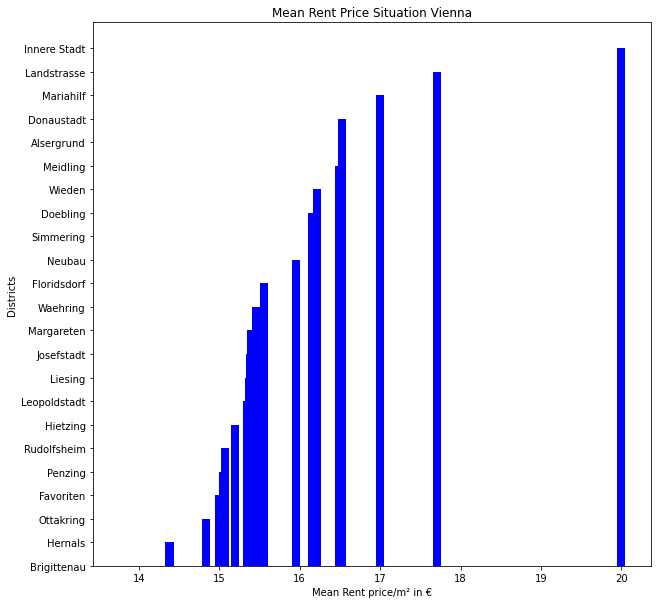

In [51]:
# barchart rentprices situation
price = dataset_sorted['meanPrice']
neighborhood = dataset_sorted['Neighborhood']

fig = plt.figure(figsize = (10,10))

plt.bar(price, neighborhood, color='blue', width = 0.1)
plt.xlabel('Mean Rent price/m² in €')
plt.ylabel('Districts')
plt.title('Mean Rent Price Situation Vienna')

plt.show()

In [58]:
# calculate mean of whole vienna which is going to represent the price cap
# This is going to be the pricetarget to sort districts below this
price_cap = dataset['meanPrice'].mean()
price_cap

15.849130434782607

In [64]:
new_dataset_sorted = pd.DataFrame(dataset_sorted['meanPrice'].where(dataset_sorted['meanPrice'] < price_cap))
new_dataset_sorted

,meanPrice
19,13.79
16,14.38
15,14.83
9,15.00
13,15.04
14,15.07
12,15.19
1,15.35
22,15.37
7,15.38


#### 3.4 Explore neighborhoods

find out which neighborhood has the 10 most common venues i.e. assumed to be high frequented places. <br>
Goal is to find a correlation between density of venues and coffee shops and compare to rent prices in that district

##### Connecting to Foursquare API

In [23]:
CLIENT_ID = 'WVSVXJZNSX2RTUYH3EN414GA25RS2LCBD20FKHPWCZZH41JT' # your Foursquare ID
CLIENT_SECRET = 'TSHIWJ4MHEDR4LILPO2XNIURO4F5UJQA5YESZFQEKAZFYS32' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

##### Inspecting Floridsdorf with the highest mean rent price within the price cap 

In [67]:
floridsdorf_data = dataset.loc[20, 'Neighborhood']
floridsdorf_data

'Floridsdorf'

In [70]:
floridsdorf_lat = dataset.loc[20, 'Latitude']
floridsdorf_lon = dataset.loc[20, 'Longitude']

print('Floridsdorf coordinates are: {}, {}.'.format(floridsdorf_lat,floridsdorf_lon))

Floridsdorf coordinates are: 48.257754, 16.397285999999998.


In [130]:
def getVenues(lat, lng, radius=1000, limit=100):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    results = requests.get(url).json()
    
    # clean json and create pandas dataframe

    venues = results['response']['groups'][0]['items']
    
    nearby_venues = pd.json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    return(nearby_venues)

In [132]:
# login to foursquare and inspecting Floridsdorf in a radius of 5000m
floridsdorf_lat = lat
floridsdorf_lon = lng

floridsdorf_venues = getVenues(floridsdorf_lat,floridsdorf_lon,radius=500)
floridsdorf_venues.head()

,name,categories,lat,lng
0,Stasta Restaurant,Steakhouse,48.135798,16.279858
1,Der Stasta Hotel Vienna,Hotel,48.136128,16.280022
2,Riverside Einkaufszentrum,Shopping Mall,48.136607,16.279591
3,Okiru Running Sushi,Asian Restaurant,48.137669,16.278032
4,MERKUR,Supermarket,48.137219,16.277472


In [133]:
floridsdorf_venues.shape

(14, 4)

In [134]:
floridsdorf_venues.groupby('categories').count().sort_values(by=['name'], ascending=False)

,name,lat,lng
categories,,,
Cosmetics Shop,2,2,2
Asian Restaurant,1,1,1
Clothing Store,1,1,1
Coffee Shop,1,1,1
Gastropub,1,1,1
Gift Shop,1,1,1
Hotel,1,1,1
Plaza,1,1,1
River,1,1,1


In [135]:
print('There are {} unique categories.'.format(len(floridsdorf_venues['categories'].unique())))

There are 13 unique categories.


##### Inspecting Brigittenau since it seems to be the cheapest district

In [136]:
# brigittenau_data = dataset.loc[19, 'Neighborhood']
brigittenau_lon = dataset.loc[19, 'Longitude']
brigittenau_lat = dataset.loc[19, 'Latitude']

lat = brigittenau_lat
lng = brigittenau_lon

brigittenau_venues = getVenues(brigittenau_lat, brigittenau_lon, radius=500)
brigittenau_venues.shape

(29, 4)

#### 3.5 Find correlations

In [146]:
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [163]:
dataset.corr()['meanPrice'].sort_values()

Postal Code   -0.519377
Latitude       0.007642
Longitude      0.312655
large          0.339406
big            0.690340
small          0.825900
medium         0.915815
meanPrice      1.000000
Name: meanPrice, dtype: float64

It seems to be that there is a high correlation with medium sized objects. Further exploration utilizing this feature.

#### 3.6 Visualizing correlations

<AxesSubplot:xlabel='medium', ylabel='meanPrice'>

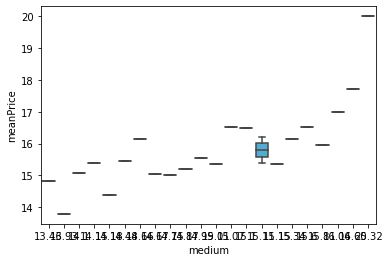

In [164]:
sns.boxplot(x="medium", y="meanPrice", data=dataset)

(0.0, 22.76747449908237)

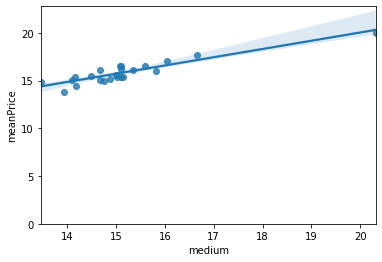

In [165]:
sns.regplot(x="medium", y="meanPrice", data=dataset)
plt.ylim(0,)

#### 3.7 Rearranging data

In [167]:
dataset_sorted_medium = dataset.sort_values(by=['medium'])
dataset_sorted_medium

,Neighborhood,small,medium,big,large,meanPrice,Postal Code,Latitude,Longitude
15,Ottakring,17.16,13.46,13.27,15.14,14.83,1160,48.209344,16.327269
19,Brigittenau,16.09,13.93,11.26,11.93,13.79,1200,48.233069,16.370942
14,Rudolfsheim,16.81,14.10,12.28,12.49,15.07,1150,48.194142,16.333661
4,Margareten,17.07,14.15,13.52,16.60,15.40,1050,48.190615,16.354170
16,Hernals,14.67,14.18,14.34,15.21,14.38,1170,48.218361,16.332049
17,Waehring,15.75,14.48,16.40,17.22,15.46,1180,48.226844,16.342426
10,Simmering,16.88,14.66,11.27,0.00,16.15,1110,48.175180,16.412319
13,Penzing,18.54,14.67,14.02,12.09,15.04,1140,48.197241,16.285466
9,Favoriten,16.15,14.75,13.95,11.90,15.00,1100,48.178493,16.374804
12,Hietzing,16.28,14.87,14.72,15.53,15.19,1130,48.188226,16.300459


#### 3.8 Inspecting neighborhoods after new sorting
Gathering venues and selecting Top 10 common venues of each neighborhood

In [170]:
ottakring_lat = dataset.loc[15, 'Latitude']
ottakring_lon = dataset.loc[15,'Longitude']

lat = ottakring_lat
lng = ottakring_lon

ottakring_venues = getVenues(lat, lng, radius=5000)
ottakring_venues

,name,categories,lat,lng
0,Pizzeria Da Filippo,Italian Restaurant,48.210482,16.327725
1,Mani Wien,Mediterranean Restaurant,48.213248,16.336070
2,Halle D,Concert Hall,48.202307,16.333359
3,Yppenplatz,Plaza,48.213500,16.335955
4,Konoba,Mediterranean Restaurant,48.207123,16.346944
...,...,...,...,...
95,Schlosspark Schönbrunn,Park,48.181597,16.310577
96,Kolar,Gastropub,48.210538,16.370033
97,Lamm,Falafel Restaurant,48.188051,16.333394
98,Kaiserliche Wagenburg Wien,History Museum,48.186058,16.310204


In [179]:
otta_counts = ottakring_venues['categories'].value_counts().to_frame()
otta_counts

,categories
Plaza,7
Austrian Restaurant,7
Hotel,6
Café,6
Coffee Shop,5
Park,5
Ice Cream Shop,5
Art Museum,3
Restaurant,3
Gastropub,3


In [183]:
ottakring_venues_sum_top10 = otta_counts[0:11].sum()
ottakring_venues_sum_top10

categories    52
dtype: int64

In [185]:
brigittenau_counts = brigittenau_venues['categories'].value_counts().to_frame()
brigittenau_venues_sum_top10 = brigittenau_counts[0:11].sum()
brigittenau_venues_sum_top10

categories    14
dtype: int64

In [191]:
rudolfsheim_lat = dataset.loc[14,'Latitude']
rudolfsheim_lon = dataset.loc[14, 'Longitude']

lat = rudolfsheim_lat
lng = rudolfsheim_lon

rudolfsheim_venues = getVenues(lat, lng, radius=5000)

,name,categories,lat,lng
0,Mercure Raphael Wien,Hotel,48.191964,16.339053
1,Gota Coffee Experts,Coffee Shop,48.191240,16.326945
2,Vienna Hostel Ruthensteiner,Hostel,48.193419,16.335592
3,Das Augustin,Austrian Restaurant,48.196657,16.323068
4,Turnhalle,Café,48.189570,16.334408


In [192]:
rudolfsheim_counts = rudolfsheim_venues['categories'].value_counts().to_frame()
rudolfsheim_venues_sum_top10 = rudolfsheim_counts[0:11].sum()
rudolfsheim_venues_sum_top10

categories    46
dtype: int64

In [226]:
margareten_lat = dataset.loc[4,'Latitude']
margareten_lon = dataset.loc[4, 'Longitude']

lat = margareten_lat
lng = margareten_lon

margareten_venues = getVenues(lat, lng, radius=5000)

In [227]:
margareten_counts = rudolfsheim_venues['categories'].value_counts().to_frame()
margareten_venues_sum_top10 = margareten_counts[0:11].sum()
margareten_venues_sum_top10

categories    46
dtype: int64

In [228]:
hernals_lat = dataset.loc[16,'Latitude']
hernals_lon = dataset.loc[16, 'Longitude']

lat = hernals_lat
lng = hernals_lon

hernals_venues = getVenues(lat, lng, radius=5000)

In [229]:
hernals_counts = hernals_venues['categories'].value_counts().to_frame()
hernals_venues_sum_top10 = hernals_counts[0:11].sum()
hernals_venues_sum_top10

categories    55
dtype: int64

In [231]:
waehring_lat = dataset.loc[17,'Latitude']
waehring_lon = dataset.loc[17, 'Longitude']

lat = waehring_lat
lng = waehring_lon

waehring_venues = getVenues(lat, lng, radius=5000)

waehring_counts = waehring_venues['categories'].value_counts().to_frame()
waehring_venues_sum_top10 = waehring_counts[0:11].sum()
waehring_venues_sum_top10

categories    60
dtype: int64

In [232]:
simmering_lat = dataset.loc[10,'Latitude']
simmering_lon = dataset.loc[10, 'Longitude']

lat = simmering_lat
lng = simmering_lon

simmering_venues = getVenues(lat, lng, radius=5000)

simmering_counts = simmering_venues['categories'].value_counts().to_frame()
simmering_venues_sum_top10 = simmering_counts[0:11].sum()
simmering_venues_sum_top10

categories    52
dtype: int64

In [233]:
penzing_lat = dataset.loc[13,'Latitude']
penzing_lon = dataset.loc[13, 'Longitude']

lat = penzing_lat
lng = penzing_lon

penzing_venues = getVenues(lat, lng, radius=5000)

penzing_counts = penzing_venues['categories'].value_counts().to_frame()
penzing_venues_sum_top10 = penzing_counts[0:11].sum()
penzing_venues_sum_top10

categories    45
dtype: int64

In [234]:
favoriten_lat = dataset.loc[9,'Latitude']
favoriten_lon = dataset.loc[9, 'Longitude']

lat = favoriten_lat
lng = favoriten_lon

favoriten_venues = getVenues(lat, lng, radius=5000)

favoriten_counts = favoriten_venues['categories'].value_counts().to_frame()
favoriten_venues_sum_top10 = favoriten_counts[0:11].sum()
favoriten_venues_sum_top10

categories    49
dtype: int64

In [236]:
hietzing_lat = dataset.loc[12,'Latitude']
hietzing_lon = dataset.loc[12, 'Longitude']

lat = hietzing_lat
lng = hietzing_lon

hietzing_venues = getVenues(lat, lng, radius=5000)

hietzing_counts = hietzing_venues['categories'].value_counts().to_frame()
hietzing_venues_sum_top10 = hietzing_counts[0:11].sum()
hietzing_venues_sum_top10

categories    46
dtype: int64

In [238]:
floridsdorf_lat = dataset.loc[20,'Latitude']
floridsdorf_lon = dataset.loc[20, 'Longitude']

lat = floridsdorf_lat
lng = floridsdorf_lon

floridsdorf_venues = getVenues(lat, lng, radius=5000)

floridsdorf_counts = floridsdorf_venues['categories'].value_counts().to_frame()
floridsdorf_venues_sum_top10 = floridsdorf_counts[0:11].sum()
floridsdorf_venues_sum_top10

categories    55
dtype: int64

In [239]:
leopoldstadt_lat = dataset.loc[1,'Latitude']
leopoldstadt_lon = dataset.loc[1, 'Longitude']

lat = leopoldstadt_lat
lng = leopoldstadt_lon

leopoldstadt_venues = getVenues(lat, lng, radius=5000)

leopoldstadt_counts = leopoldstadt_venues['categories'].value_counts().to_frame()
leopoldstadt_venues_sum_top10 = leopoldstadt_counts[0:11].sum()
leopoldstadt_venues_sum_top10

categories    52
dtype: int64

In [241]:
alsergrund_lat = dataset.loc[8,'Latitude']
alsergrund_lon = dataset.loc[8, 'Longitude']

lat = alsergrund_lat
lng = alsergrund_lon

alsergrund_venues = getVenues(lat, lng, radius=5000)

alsergrund_counts = alsergrund_venues['categories'].value_counts().to_frame()
alsergrund_venues_sum_top10 = alsergrund_counts[0:11].sum()
alsergrund_venues_sum_top10

categories    58
dtype: int64

In [242]:
meidling_lat = dataset.loc[11,'Latitude']
meidling_lon = dataset.loc[11, 'Longitude']

lat = meidling_lat
lng = meidling_lon

meidling_venues = getVenues(lat, lng, radius=5000)

meidling_counts = meidling_venues['categories'].value_counts().to_frame()
meidling_venues_sum_top10 = meidling_counts[0:11].sum()
meidling_venues_sum_top10

categories    42
dtype: int64

In [243]:
wieden_lat = dataset.loc[3,'Latitude']
wieden_lon = dataset.loc[3, 'Longitude']

lat = wieden_lat
lng = wieden_lon

wieden_venues = getVenues(lat, lng, radius=5000)

wieden_counts = wieden_venues['categories'].value_counts().to_frame()
wieden_venues_sum_top10 = wieden_counts[0:11].sum()
wieden_venues_sum_top10

categories    53
dtype: int64

In [245]:
josefstadt_lat = dataset.loc[7,'Latitude']
josefstadt_lon = dataset.loc[7, 'Longitude']

lat = josefstadt_lat
lng = josefstadt_lon

josefstadt_venues = getVenues(lat, lng, radius=5000)

josefstadt_counts = josefstadt_venues['categories'].value_counts().to_frame()
josefstadt_venues_sum_top10 = josefstadt_counts[0:11].sum()
josefstadt_venues_sum_top10

categories    53
dtype: int64

In [247]:
liesing_lat = dataset.loc[22,'Latitude']
liesing_lon = dataset.loc[22, 'Longitude']

lat = liesing_lat
lng = liesing_lon

liesing_venues = getVenues(lat, lng, radius=5000)

liesing_counts = liesing_venues['categories'].value_counts().to_frame()
liesing_venues_sum_top10 = liesing_counts[0:11].sum()
liesing_venues_sum_top10

categories    42
dtype: int64

In [248]:
doebling_lat = dataset.loc[18,'Latitude']
doebling_lon = dataset.loc[18, 'Longitude']

lat = doebling_lat
lng = doebling_lon

doebling_venues = getVenues(lat, lng, radius=5000)

doebling_counts = doebling_venues['categories'].value_counts().to_frame()
doebling_venues_sum_top10 = doebling_counts[0:11].sum()
doebling_venues_sum_top10

categories    63
dtype: int64

In [249]:
donaustadt_lat = dataset.loc[21,'Latitude']
donaustadt_lon = dataset.loc[21, 'Longitude']

lat = donaustadt_lat
lng = donaustadt_lon

donaustadt_venues = getVenues(lat, lng, radius=5000)

donaustadt_counts = donaustadt_venues['categories'].value_counts().to_frame()
donaustadt_venues_sum_top10 = donaustadt_counts[0:11].sum()
donaustadt_venues_sum_top10

categories    46
dtype: int64

In [251]:
neubau_lat = dataset.loc[6,'Latitude']
neubau_lon = dataset.loc[6, 'Longitude']

lat = neubau_lat
lng = neubau_lon

neubau_venues = getVenues(lat, lng, radius=5000)

neubau_counts = neubau_venues['categories'].value_counts().to_frame()
neubau_venues_sum_top10 = neubau_counts[0:11].sum()
neubau_venues_sum_top10

categories    51
dtype: int64

In [252]:
mariahilf_lat = dataset.loc[5,'Latitude']
mariahilf_lon = dataset.loc[5, 'Longitude']

lat = mariahilf_lat
lng = mariahilf_lon

mariahilf_venues = getVenues(lat, lng, radius=5000)

mariahilf_counts = mariahilf_venues['categories'].value_counts().to_frame()
mariahilf_venues_sum_top10 = mariahilf_counts[0:11].sum()
mariahilf_venues_sum_top10

categories    49
dtype: int64

In [253]:
landstrasse_lat = dataset.loc[2,'Latitude']
landstrasse_lon = dataset.loc[2, 'Longitude']

lat = landstrasse_lat
lng = landstrasse_lon

landstrasse_venues = getVenues(lat, lng, radius=5000)

landstrasse_counts = landstrasse_venues['categories'].value_counts().to_frame()
landstrasse_venues_sum_top10 = landstrasse_counts[0:11].sum()
landstrasse_venues_sum_top10

categories    53
dtype: int64

In [ ]:
landstrasse_lat = dataset.loc[2,'Latitude']
landstrasse_lon = dataset.loc[2, 'Longitude']

lat = landstrasse_lat
lng = landstrasse_lon

landstrasse_venues = getVenues(lat, lng, radius=5000)

landstrasse_counts = landstrasse_venues['categories'].value_counts().to_frame()
landstrasse_venues_sum_top10 = landstrasse_counts[0:11].sum()
landstrasse_venues_sum_top10

In [254]:
innerestadt_lat = dataset.loc[0,'Latitude']
innerestadt_lon = dataset.loc[0, 'Longitude']

lat = innerestadt_lat
lng = innerestadt_lon

innerestadt_venues = getVenues(lat, lng, radius=5000)

innerestadt_counts = innerestadt_venues['categories'].value_counts().to_frame()
innerestadt_venues_sum_top10 = innerestadt_counts[0:11].sum()
innerestadt_venues_sum_top10

categories    56
dtype: int64

#### 3.9 Creating new dataframe with Top 10 Venues

In [255]:
# inserting top 10 common venues in each neighborhood

dataset_sorted_medium_new = dataset_sorted_medium.insert(9, 'SumTop10', [int(ottakring_venues_sum_top10),
                                                                         int(brigittenau_venues_sum_top10),
                                                                         int(rudolfsheim_venues_sum_top10),
                                                                         int(margareten_venues_sum_top10),
                                                                         int(hernals_venues_sum_top10),
                                                                         int(waehring_venues_sum_top10),
                                                                         int(simmering_venues_sum_top10),
                                                                         int(penzing_venues_sum_top10),
                                                                         int(favoriten_venues_sum_top10),
                                                                         int(hietzing_venues_sum_top10),
                                                                         int(floridsdorf_venues_sum_top10),
                                                                         int(leopoldstadt_venues_sum_top10),
                                                                         int(alsergrund_venues_sum_top10),
                                                                         int(meidling_venues_sum_top10),
                                                                         int(wieden_venues_sum_top10),
                                                                         int(josefstadt_venues_sum_top10),
                                                                         int(liesing_venues_sum_top10),
                                                                         int(doebling_venues_sum_top10),
                                                                         int(donaustadt_venues_sum_top10),
                                                                         int(neubau_venues_sum_top10),
                                                                         int(mariahilf_venues_sum_top10),
                                                                         int(landstrasse_venues_sum_top10),
                                                                         int(innerestadt_venues_sum_top10)])

In [257]:
# check new dataframe
dataset_sorted_medium

,Neighborhood,small,medium,big,large,meanPrice,Postal Code,Latitude,Longitude,SumTop10
15,Ottakring,17.16,13.46,13.27,15.14,14.83,1160,48.209344,16.327269,52
19,Brigittenau,16.09,13.93,11.26,11.93,13.79,1200,48.233069,16.370942,14
14,Rudolfsheim,16.81,14.10,12.28,12.49,15.07,1150,48.194142,16.333661,46
4,Margareten,17.07,14.15,13.52,16.60,15.40,1050,48.190615,16.354170,46
16,Hernals,14.67,14.18,14.34,15.21,14.38,1170,48.218361,16.332049,55
17,Waehring,15.75,14.48,16.40,17.22,15.46,1180,48.226844,16.342426,60
10,Simmering,16.88,14.66,11.27,0.00,16.15,1110,48.175180,16.412319,52
13,Penzing,18.54,14.67,14.02,12.09,15.04,1140,48.197241,16.285466,45
9,Favoriten,16.15,14.75,13.95,11.90,15.00,1100,48.178493,16.374804,49
12,Hietzing,16.28,14.87,14.72,15.53,15.19,1130,48.188226,16.300459,46


#### 3.9.1 Check of correlations corresponding to Top 10 Venues

<AxesSubplot:xlabel='SumTop10', ylabel='medium'>

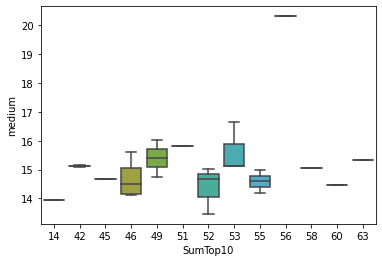

In [261]:
sns.boxplot(x="SumTop10", y="medium", data=dataset_sorted_medium)

(0.0, 20.79020626714066)

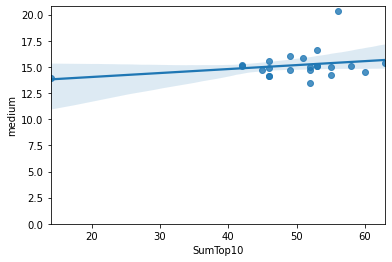

In [259]:
sns.regplot(x="SumTop10", y="medium", data=dataset_sorted_medium)
plt.ylim(0,)

In [260]:
dataset_sorted_medium.corr()['SumTop10'].sort_values()

Postal Code   -0.252985
Longitude      0.081854
small          0.172695
Latitude       0.187204
medium         0.269063
large          0.302358
meanPrice      0.405127
big            0.503783
SumTop10       1.000000
Name: SumTop10, dtype: float64

### 4. Model Development

#### 4.1 Fit a linear regression model to predict the location using list of features

In [262]:
features = ["Longitude","small","Latitude","medium","large","meanPrice","big"]

In [263]:
X = dataset_sorted_medium[features]
Y = dataset_sorted_medium['SumTop10']

lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y) # R^2

0.4692983119625198

In [266]:
Input=[('Scale', StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [267]:
pipe = Pipeline(Input)
pipe.fit(X,Y)
pipe.score(X,Y)

1.0

#### 4.2 Model Evaluation and Refinement

In [269]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

##### Split data into training and testing sets

In [270]:
# X = dataset_sorted_medium[features]
# Y = dataset_sorted_medium['SumTop10']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

Number of test samples: 5
Number of training samples: 18


In [271]:
from sklearn.linear_model import Ridge

In [272]:
Ridge = Ridge(alpha=0.1)
Ridge.fit(x_train,y_train)
Ridge.score(x_test,y_test)

-0.43188838436458354

#### 4.3 Finding the best model

In [289]:
# importing additional necessary libraries

from sklearn import svm
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

##### Remove outliers

In [290]:
def get_outliers(data, outliers_fraction=0.25):
    clf = svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="rbf", gamma=0.1)
    clf.fit(data)
    result = clf.predict(data)
    return result

In [291]:
training_dataset = dataset_sorted_medium[get_outliers(dataset_sorted_medium[features], 0.15)==1]

#### 4.4 Predicting best model

C:\Users\oxale\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


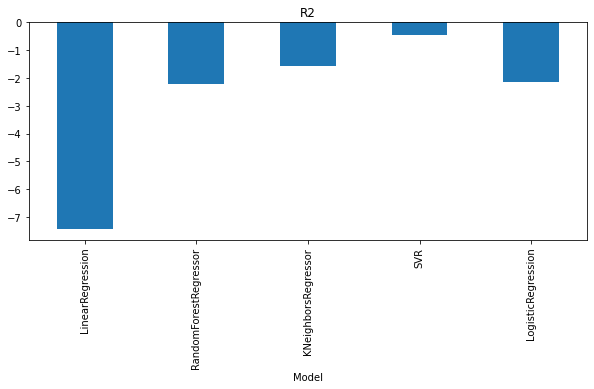

In [292]:
X = training_dataset[features]
Y = training_dataset['SumTop10']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

models = [LinearRegression(),
          RandomForestRegressor(n_estimators=100, max_features='sqrt'),
          KNeighborsRegressor(n_neighbors=6),
          SVR(kernel='linear'),
          LogisticRegression()]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    # get model name
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    # fit model on training dataset
    model.fit(x_train, y_train)
    # predict for test dataset and calculate R^2
    tmp['R2'] = r2_score(y_test, model.predict(x_test))
    # write obtained data
    TestModels = TestModels.append([tmp])

TestModels.set_index('Model', inplace=True)

# visualize
fig, axes = plt.subplots(ncols=1, figsize=(10,4))
TestModels.R2.plot(ax=axes, kind='bar', title='R2')
plt.show()

This outcome is a problem. SVR(Support Vector Regression) suggests to apply a Support Vector Model. But every output is negative. A better dataset is needed.

### 5. Conclusions

#### 5.1 Summary

After applying different models with the given datasets a sufficient statement can't be made at this point. Obviously better and bigger datasets are needed like data with tourist-frequency, offices, passers-by and number of rentable objects from each neighborhood. To have at least an idea where a suitable place could be for a coffee house, comparing the amount of top 10 common venues in relation to the mean rent situation in each district might be raw guideline. Refering to figures at 5.2.
Since this is just for practice and studies purpose only a cut this point is reasonable. For future and further analysis a new approach is going to be needed.

#### 5.2 Raw overview

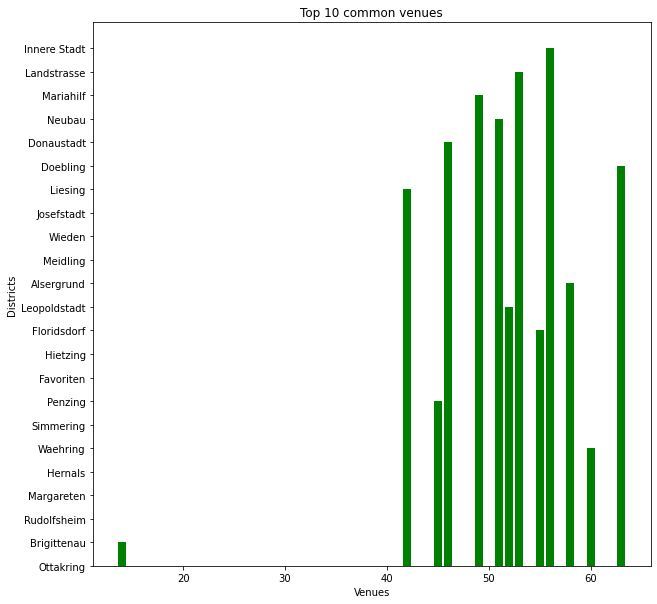

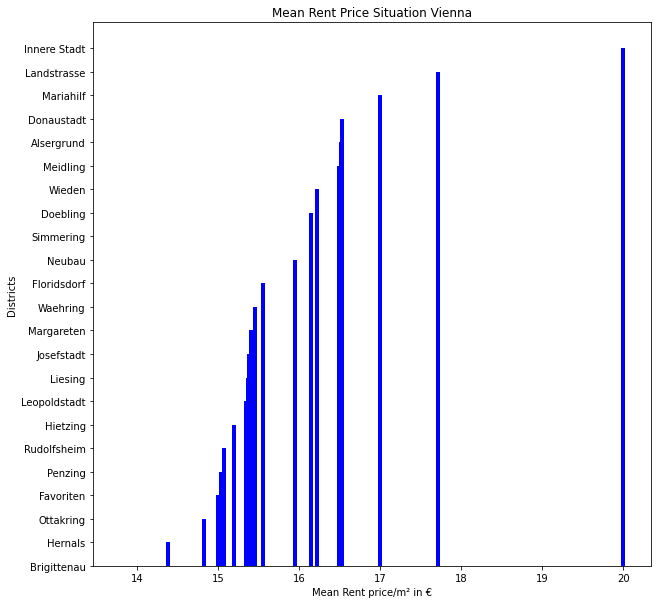

In [287]:
# barchart with top 10 common venues in each neighborhood
venues_top10 = dataset_sorted_medium['SumTop10']
neighborhood = dataset_sorted_medium['Neighborhood']

fig = plt.figure(figsize = (10,10))

plt.bar(venues_top10, neighborhood, color='green', width = 0.8)
plt.xlabel('Venues')
plt.ylabel('Districts')
plt.title('Top 10 common venues')

# barchart rentprices situation
price = dataset_sorted['meanPrice']
neighborhood = dataset_sorted['Neighborhood']

fig = plt.figure(figsize = (10,10))

plt.bar(price, neighborhood, color='blue', width = 0.05)
plt.xlabel('Mean Rent price/m² in €')
plt.ylabel('Districts')
plt.title('Mean Rent Price Situation Vienna')

plt.show()

### 6. Future Directions

Refering to 5.2 given a raw overview it can be assumed that an ideal spot for a new coffee house could be in Floridsdorf. It's within the overall mean rent price and has enough frequented venues. But this needs to be examined in a future exploration.

<footer>Last updated: 06/07/2021</footer>